# Linear Regression Assignment 

### Bike Sharing System - BoomBikes 

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Objective
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##### Reading and Understanding the Data

In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [482]:
# Reading the bike sharing dataset
bike_sharing_df = pd.read_csv('day.csv')

In [483]:
# Dataframe Shape
bike_sharing_df.shape

(730, 16)

In [484]:
# Basic dataframe information
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [485]:
# View the sample data
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [486]:
# View the sample data
bike_sharing_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


The dataset has a header row and no footer. It does not have any null values across all columns. So, it appears to be fine. We can proceed with Data Cleanup

#### Data Cleanup

**Analyzing and Dropping the columns which may not help in analysis** 

As per the data dictionary, below is the high level column analysis:
-   'instant' is a record index, so it will not be useful and can be dropped.
-   'dteday' - the dataset already has the features exracted from the date, it can be dropped.
-   'casual' and 'registered' has been summed and added to column 'cnt'

So, these 4 columns can be dropped. 


In [487]:
# Dropping columns as per the analysis.
bike_sharing_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [488]:
# Shape of the dataset after dropping the columns
bike_sharing_df.shape

(730, 12)

In [489]:
# viewing the dataset
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Feature enhancement**

The data dictionary suggest below columns as a categorical variables, but the dataset shows them as numerical.
-   season : season (1:spring, 2:summer, 3:fall, 4:winter)
-   mnth : month ( 1 to 12)
-   weekday : day of the week
-    weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



**Updating the values in the dataframe as per the dictionary**

In [490]:
# Replacing the numerical values with Categorical values - 
bike_sharing_df.season.replace({
    1:"Spring", 
    2:"Summer", 
    3:"Fall", 
    4:"Winter"}, inplace = True)

In [491]:
bike_sharing_df.mnth.replace(
    {
        1: 'Jan', 
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'}, inplace = True)

In [492]:
bike_sharing_df.weekday.replace(
    {
        0: 'Sun',
        1: 'Mon',
        2: 'Tue',
        3: 'Wed',
        4: 'Thu',
        5: 'Fri',
        6: 'Sat'}, inplace=True)

In [493]:
bike_sharing_df.weathersit.replace(
    {
        1:'Good',
        2:'Moderate',
        3:'Bad',
        4:'Severe'}, inplace = True)

In [494]:
# Updated dataset
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [495]:
# General information about dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [496]:
# View unique values across all columns
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Exploratory Data Analysis

The dataset shows that we have below segregation of the variables:
- **Categorical**: season, yr, mnth, holiday, weekday, workingday, weathersit
- **Numerical**: temp, atemp, hum, windspeed, cnt

**Drawing a box plot on the numerical variables to see the outliers**

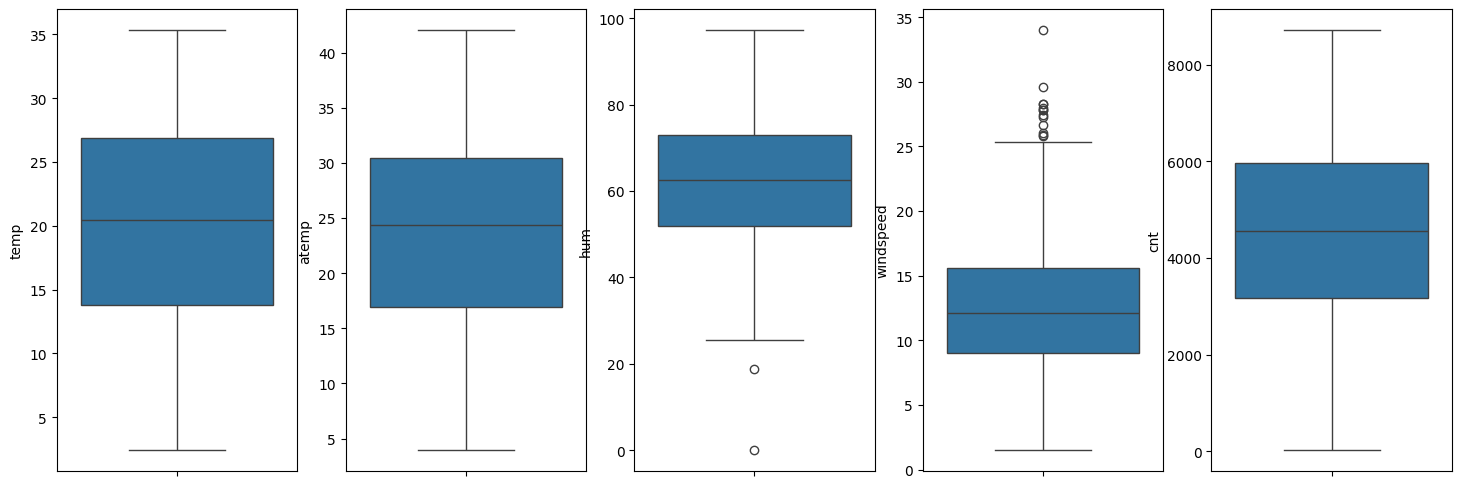

In [497]:
# Draw boxplot for numerical variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(18,6))

i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=bike_sharing_df)
    i+=1

The plots suggest there are no major outliers that requires handling.

<Figure size 1500x3000 with 0 Axes>

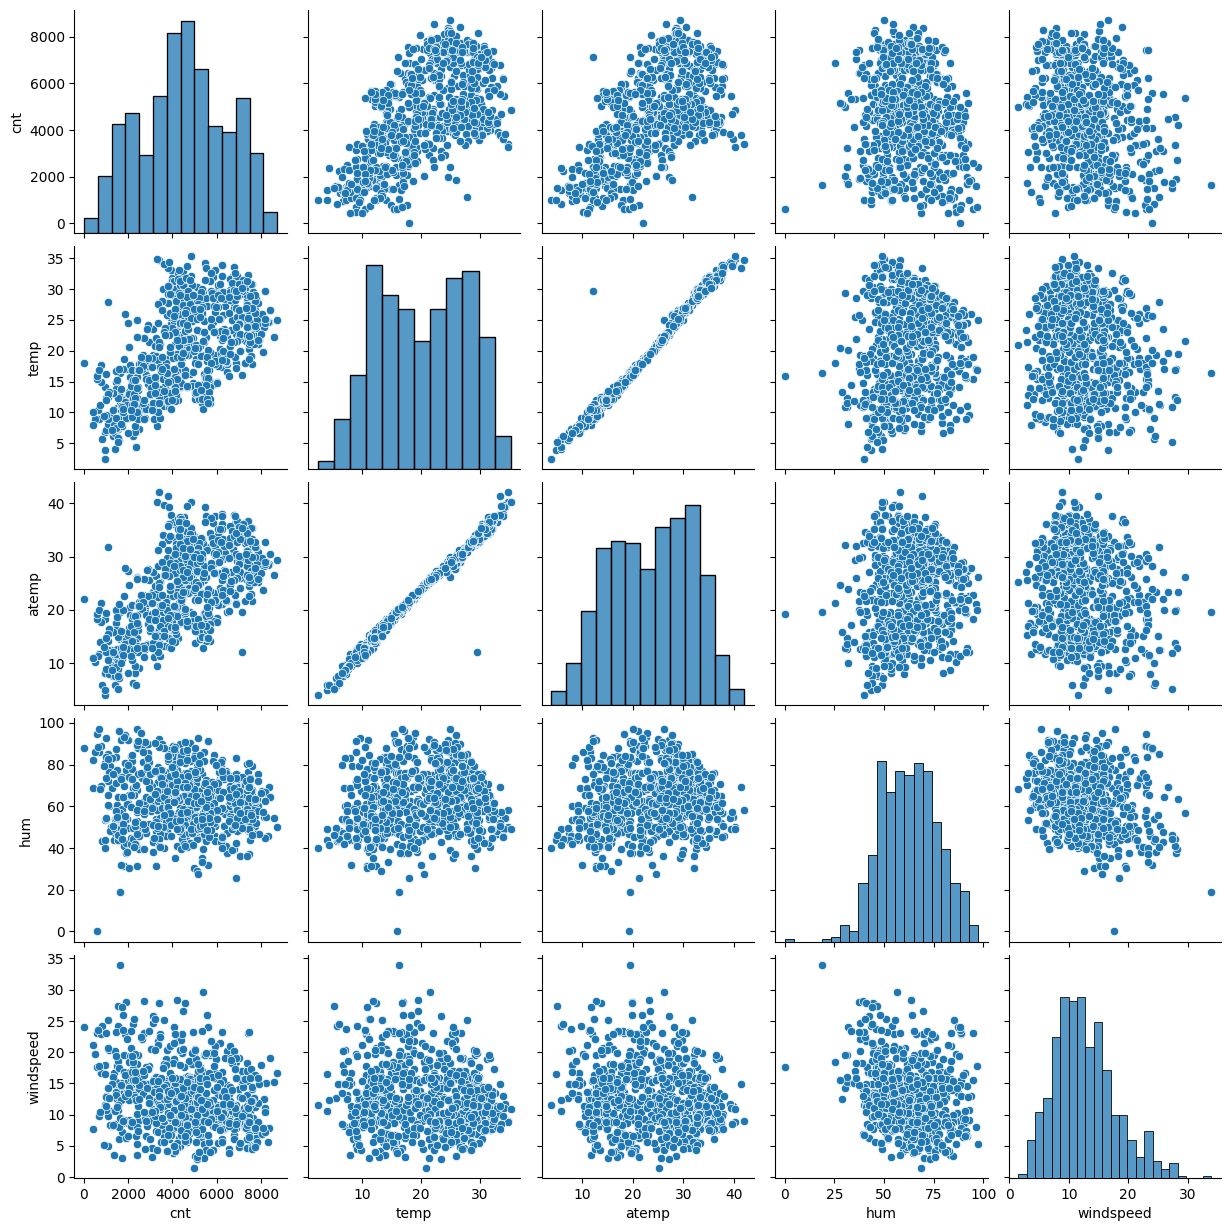

In [498]:
# Drawing pairplot to view the relationship

plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

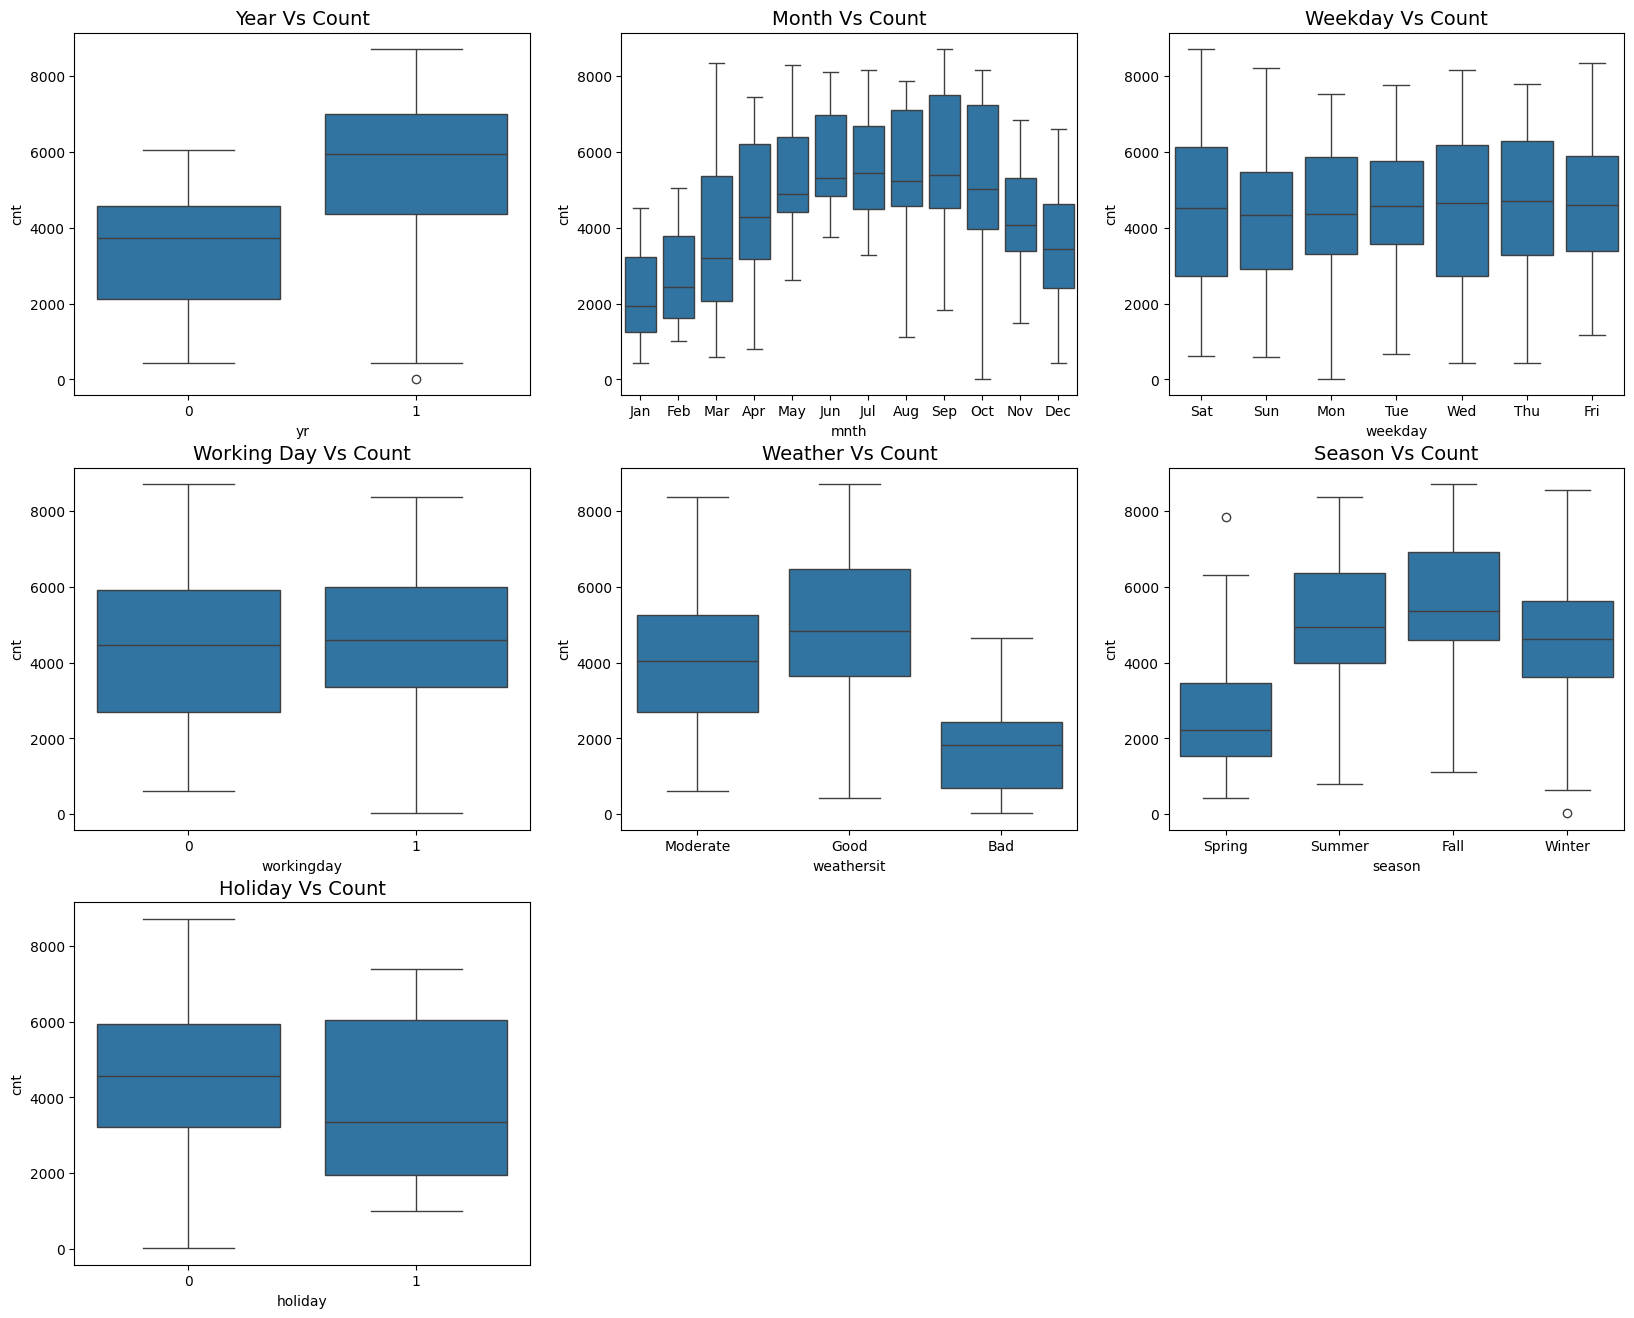

In [499]:
# viewing categorical variable distribution using box plot over target variable 'cnt'

cols = {
    'yr': 'Year', 
    'mnth': "Month", 
    'weekday':'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather', 
    'season': 'Season',
    'holiday': 'Holiday'
    }

plt.figure(figsize=(20, 16))
i = 1
for k, v in cols.items():
    plt.subplot(3,3,i)
    sns.boxplot(x = k, y = 'cnt', data = bike_sharing_df)
    plt.title(f"{v} Vs Count", fontsize=14)
    i+=1
   

plt.show()

**Inference**
-   The Demand has increased in year 2019 significantly.
-   The average demand keeps growing on monthly basis till July and then starts decreasing.
-   The demand appears consistent throughout the Weekday.
-   The working or non-working days do not impact the demand, it remains consistent.
-   The Clear weather has the highest demand for bikes.
-   The Fall season witnesses highest demand for bikes.
-   The holidays have reduced demand for the bikes.


**Plotting correlation between the numeric variables**


In [500]:
# Get the list of numeric and categorical columns in separate lists
numeric_cols = list(bike_sharing_df.select_dtypes(include=['float64', 'int64']).columns)
categorical_cols = list(bike_sharing_df.select_dtypes(exclude=['float64', 'int64']).columns)

print("Numeric Columns: ", numeric_cols)
print("Categorical Columns: ", categorical_cols)

Numeric Columns:  ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
Categorical Columns:  ['season', 'mnth', 'weekday', 'weathersit']


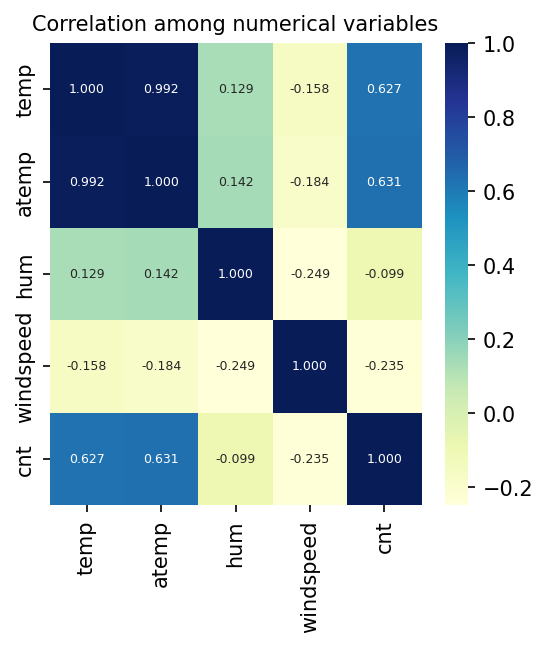

In [501]:
# Plot coorelation of the numerical variables
bike_df_corr = bike_sharing_df[["temp","atemp","hum","windspeed","cnt"]].corr()

plt.figure(figsize=(4, 4), dpi=150)
plt.title("Correlation among numerical variables", fontsize=10)
sns.heatmap(bike_df_corr, annot= True, cmap="YlGnBu", fmt='.3f',  annot_kws={"size": 6})
plt.show()


**Inference from the Heatmap**

- temp and atemp have a high coorelation, atemp is derived from the temp variable. so, temp can be dropped.
- temp and atemp also have high coorelation with the target variable cnt. 

#### Data preparation for Linear Regression Model

**Create dummy variables for the categorical variables**

In [502]:
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["season","mnth","weekday"],drop_first=True)
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["weathersit"])

In [503]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,True,False


In [504]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_Spring        730 non-null    bool   
 9   season_Summer        730 non-null    bool   
 10  season_Winter        730 non-null    bool   
 11  mnth_Aug             730 non-null    bool   
 12  mnth_Dec             730 non-null    bool   
 13  mnth_Feb             730 non-null    bool   
 14  mnth_Jan             730 non-null    bool   
 15  mnth_Jul             730 non-null    boo

In [505]:
# Converting the Boolean columns with True/False to 1/0.
bool_columns = bike_sharing_df.select_dtypes(include=[bool]).columns

bike_sharing_df[bool_columns] = bike_sharing_df[bool_columns].astype(int)

In [506]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


**The dataset has been expanded with the dummies, now we can split data into Test and Train dataset.**

In [507]:
# Creating a dataframe y with only Target variable.
y = bike_sharing_df.pop('cnt')

In [508]:
# Creaet X as the feature dataset by copying original dataframe after dropping target variable.
X = bike_sharing_df.copy()

In [509]:
# Split the data in Train Test in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [510]:
# Train Data shape
X_train.shape

(511, 30)

In [511]:
# Test Data shape
X_test.shape

(219, 30)

In [512]:
# Scale the continuous variables within range -1 to 1 so that the coefficients do not become high.
numeric_vars = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

# Fit and transform training set only
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

In [513]:
# Describe the Training dataset after scaling.
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


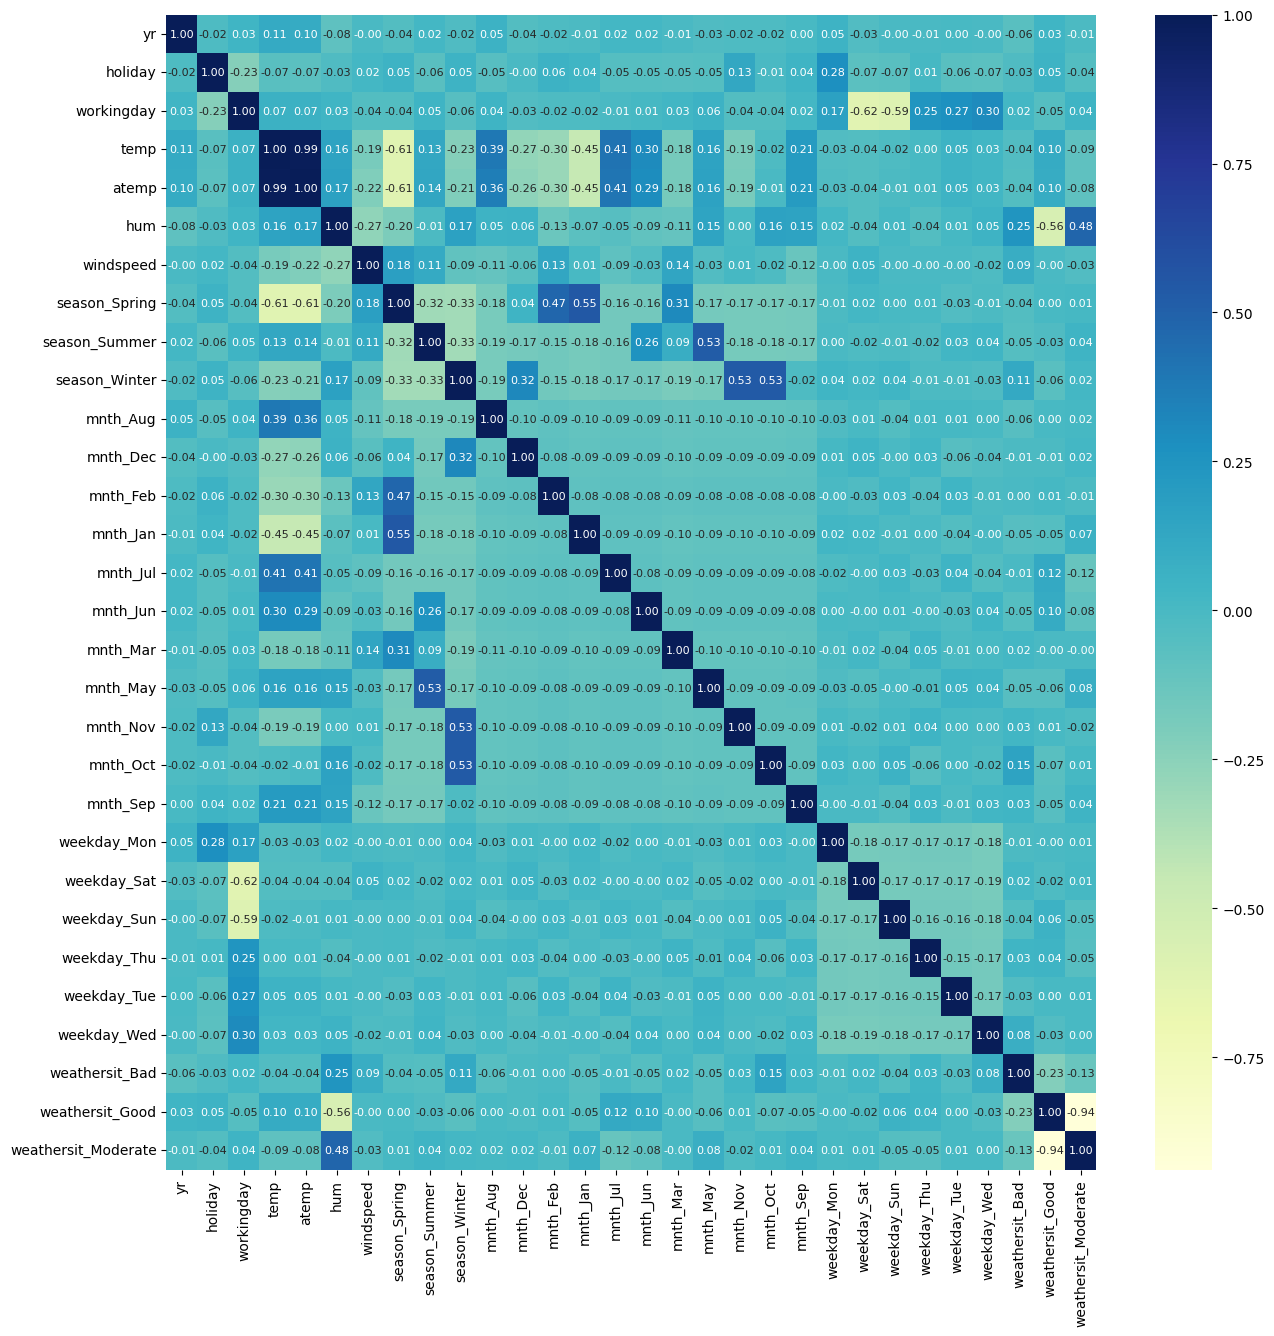

In [514]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu", fmt='.2f',  annot_kws={"size": 8})
plt.show()

##### Build the Linear Regression Model using RFE

In [515]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [516]:
# Using RFE, trim down the number of features to ~ 50%
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [517]:
# Viewing the feautres selected and their rank

feature_rank = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rank_df = pd.DataFrame(data = feature_rank, columns=['Feature Name', 'Selected?', 'Ranking'])
rank_df.sort_values(by=[ 'Selected?', 'Ranking'], ascending=[False, True])

,Feature Name,Selected?,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
5,hum,True,1
6,windspeed,True,1
7,season_Spring,True,1
9,season_Winter,True,1
14,mnth_Jul,True,1
18,mnth_Nov,True,1


In [518]:
# Define functions to build the model using statsmodel api
def build_model_using_sm(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [519]:
# Function to calculate and print VIFs for the input columns
"""
Input: 
cols: Columns for which VIF needs to be calculated.

"""
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF', ascending=False))

In [520]:
# List features selected by RFE
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [521]:
# Creating Train dataset with the RFE Selected columns
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']]
X_train_rfe.shape

(511, 15)

**Build the model: Model: 1**

In [522]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Nov,weekday_Sat,weekday_Sun,weathersit_Bad,weathersit_Good,weathersit_Moderate
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,0,1


In [523]:
selected_cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.49e-188
Time:                        23:14:13   Log-Likelihood:                -4128.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     497   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1144.4540    

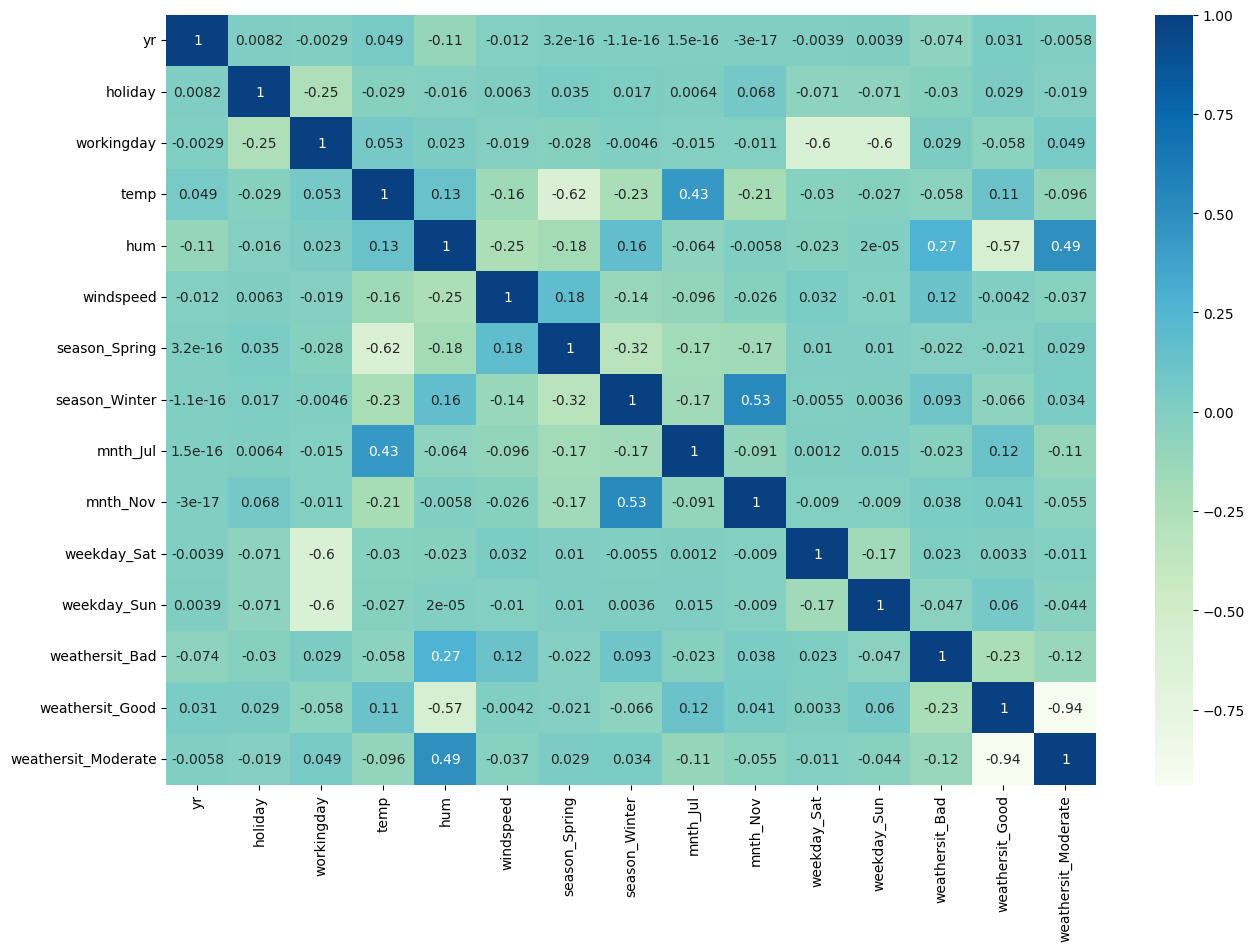

In [524]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_sharing_df[selected_cols].corr(), cmap='GnBu', annot=True)
plt.show()

##### Enhancing the Model: Model 2

In [525]:
# The column holiday has a negative coefficient and high p-value. dropping the column.
selected_cols = ['yr', 
                 #'holiday', 
                'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                'mnth_Nov', 'weekday_Sat', 'weekday_Sun', 'weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.49e-188
Time:                        23:14:15   Log-Likelihood:                -4128.8
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     497   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 969.3192    

##### Enhancing the Model: Model 3


In [526]:
# The column weekday_Sun has a high p-value. dropping the column.
selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun',
                'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                'mnth_Nov', 'weekday_Sat',  'weathersit_Bad', 'weathersit_Good', 'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.54e-188
Time:                        23:14:15   Log-Likelihood:                -4130.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1236.0984    

##### Enhancing the Model: Model 4


In [527]:
# The column weathersit_Good has a has high VIF, and high correlation with humidity.
selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun', 'weathersit_Good',
                'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                'mnth_Nov', 'weekday_Sat', 'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.54e-188
Time:                        23:14:15   Log-Likelihood:                -4130.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2534.0483    

##### Enhancing the Model: Model 5


In [528]:
# The column hum has a has high VIF, and high correlation with humidity.
selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun', 'weathersit_Good', 'hum',
                'workingday', 'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                'mnth_Nov', 'weekday_Sat', 'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.13e-186
Time:                        23:14:15   Log-Likelihood:                -4137.5
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1834.6676    

##### Enhancing the Model: Model 6

In [529]:
# The column mnth_Nov has a has high p-value, and negative coefficient
selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun', 'weathersit_Good', 'hum', 'mnth_Nov',
                'workingday', 'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                 'weekday_Sat', 'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.07e-187
Time:                        23:14:16   Log-Likelihood:                -4139.6
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1787.2532    

##### Enhancing the Model: Model 7

In [530]:
# The column weekday_Sat has a has high correlation with workingday, and workingday has slightly high VIF. dropping the column workingday
selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun', 'weathersit_Good', 'hum', 'mnth_Nov',
                # 'workingday',
                  'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                  'weekday_Sat',
                   'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.64e-183
Time:                        23:14:16   Log-Likelihood:                -4151.2
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2162.6051    

##### Enhancing the Model: Model 8

In [531]:
# The p-value of weekday_Sat is higher than acceptable, dropping it.

selected_cols = ['yr', 
                 #'holiday', 'weekday_Sun', 'weathersit_Good', 'hum', 'mnth_Nov',
                # 'workingday',
                  'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                 # 'weekday_Sat',
                   'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.47e-184
Time:                        23:14:16   Log-Likelihood:                -4153.1
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     502   BIC:                             8362.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2192.5545    

#### Enhancing the Model: Model 9

In [532]:
# As we have dropped Weekday_Sat and workingday, adding another correlated feature - weekday_Sun to validate the model performance

selected_cols = ['yr', 
                 #'holiday', 
                 'weekday_Sun',
                #    'weathersit_Good', 'hum', 'mnth_Nov',
                # 'workingday',
                  'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                 # 'weekday_Sat',
                   'weathersit_Bad',  'weathersit_Moderate'
       ]

build_model_using_sm(selected_cols)
calculate_vif(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.22e-185
Time:                        23:14:16   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     501   BIC:                             8354.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2256.2473    

#### The model performance is acceptable now. All the p-values are 0.000, the R-Squared and Adj. R-Squared are 0.829 and 0.826. The VIF is all within acceptable range <5. 

In [533]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [534]:
#Let us build the final model using sklearn
selected_cols = ['yr',  'temp',  'windspeed', 'season_Spring', 'season_Winter', 'mnth_Jul', 
                        'weekday_Sun', 'weathersit_Bad',  'weathersit_Moderate'
       ]
#Build a model with above columns
lr = build_model_sk(X_train[selected_cols],y_train)
print(lr.intercept_,lr.coef_)

2256.2472804373188 [ 2038.53776397  4051.30773223 -1290.14635941 -1004.11055502
   387.15249624  -701.23303638  -396.93303759 -2451.42454875
  -684.39598027]


### Model evaluation

#### Residual Analysis

In [535]:
y_train_pred = lr.predict(X_train[selected_cols])

In [536]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

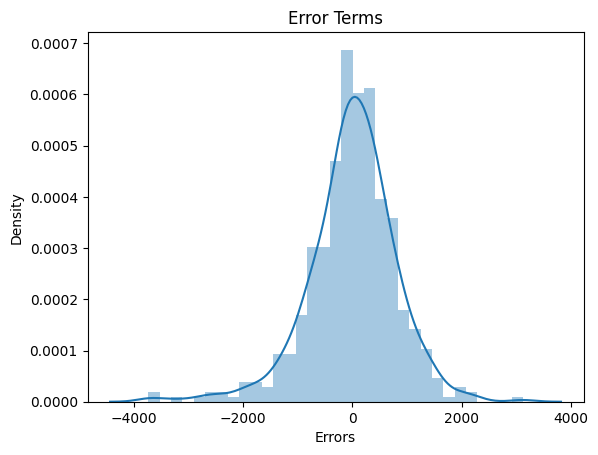

In [537]:
plot_res_dist(y_train, y_train_pred)

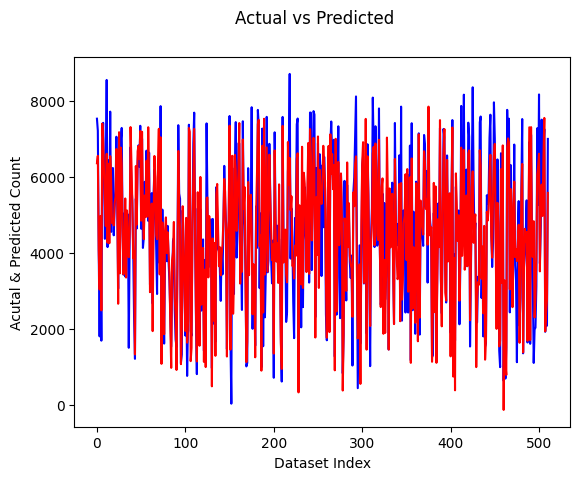

In [538]:
# Actual vs Predicted
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 12)
plt.xlabel('Dataset Index')
plt.ylabel('Acutal & Predicted Count')
plt.show()

### Model prediction
#### R-Squared value for train predictions

In [539]:
# Print R-squared Value
r2_score(y_train,y_train_pred)

0.8287451287241335

#### Prediction of value on Test Data set

In [540]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [541]:
# Predicting test data values

y_test_pred = lr.predict(X_test[selected_cols])

In [542]:
# Find out the R squared value between test and predicted test datasets
r2_score(y_test,y_test_pred)

0.8053964456583595

In [543]:
# Evaluate the model based on R-squared
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8053964456583595

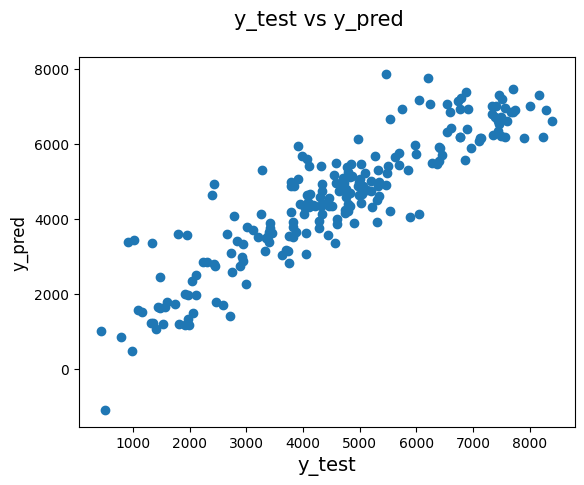

In [544]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

#### Plot Error Terms for test data

In [545]:
# Error terms plotting
def plot_err_terms(act,pred):
    c = [i for i in range(1,len(pred)+1,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)            
    plt.xlabel('Dataset - Index', fontsize=18)               
    plt.ylabel('Count - Predicted Count', fontsize=16)   

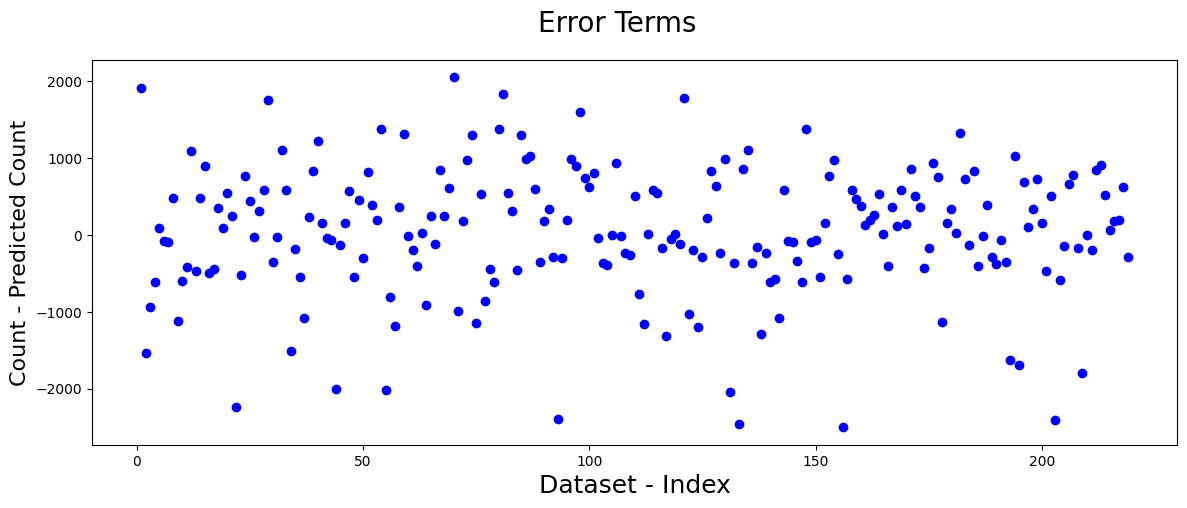

In [546]:
# Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

In [547]:

lm = build_model_using_sm(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.22e-185
Time:                        23:14:18   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     501   BIC:                             8354.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2256.2473    